In [ ]:
# Required Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")

In [ ]:
tickers = ['TECHM.NS', 'M&M.NS', 'WIPRO.NS', 'SBIN.NS']

In [ ]:
start_date = '2019-01-01'
end_date = '2023-12-31'
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [ ]:
moving_averages_20 = data.rolling(window=20).mean()
moving_averages_50 = data.rolling(window=50).mean()

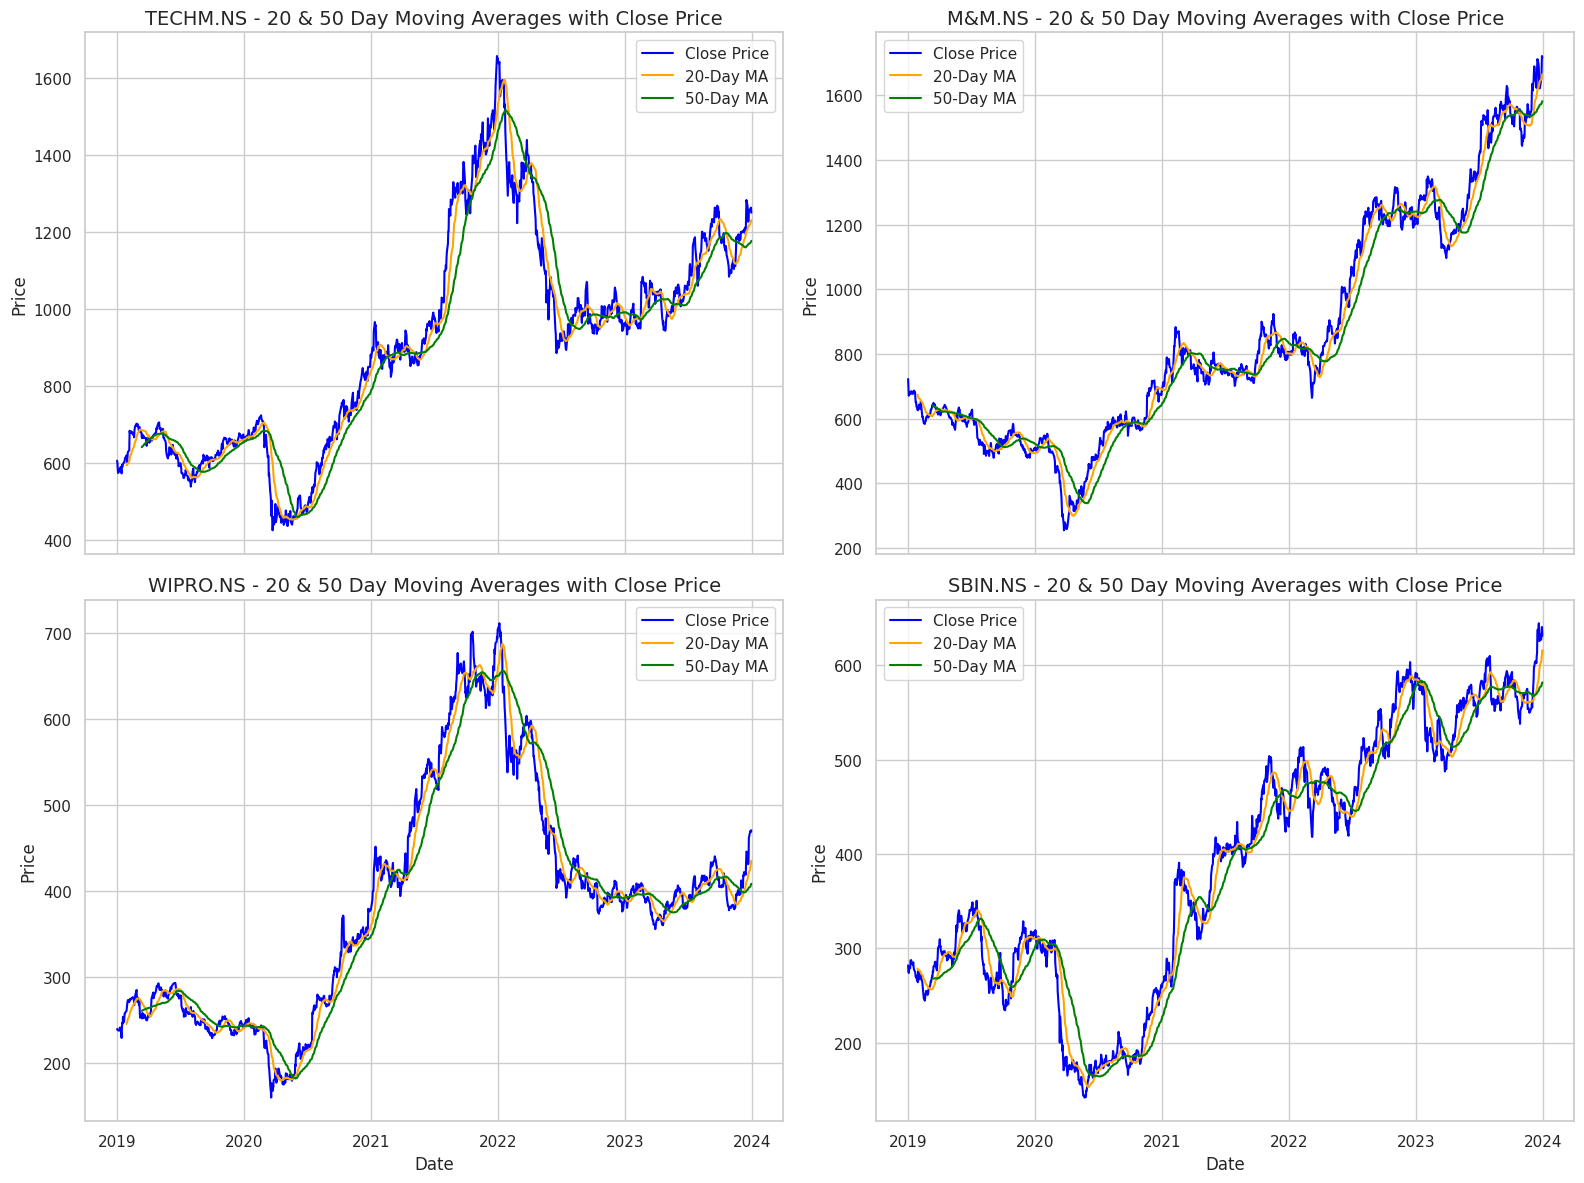

In [ ]:
# Create a single figure for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True)
axes = axes.flatten()
# Plot for each ticker in a separate subplot
for i, ticker in enumerate(tickers):
    sns.lineplot(data=data[ticker], label='Close Price', color='blue', ax=axes[i])
    sns.lineplot(data=moving_averages_20[ticker], label='20-Day MA', color='orange', ax=axes[i])
    sns.lineplot(data=moving_averages_50[ticker], label='50-Day MA', color='green', ax=axes[i])

    axes[i].set_title(f"{ticker} - 20 & 50 Day Moving Averages with Close Price", fontsize=14)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].legend()
    axes[i].grid(True)

# Remove any unused subplots (if there are any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()